In [3]:
import xarray as xr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import xarray_class_accessors as xca
import matplotlib.pyplot as plt
import warnings
import cftime
import xarray_class_accessors as xca
warnings.filterwarnings('ignore')

In [4]:
# The directory where all of the longrun mip data used in this notebook is stored.
ROOT_DIR = '/g/data/w40/ab2313/longrunmip/regrid_retimestamped'

In [5]:
IMG_DIR = '../../images/PhD/init'

In [6]:
fnames_abrupt4x = np.sort([fname for fname in os.listdir(ROOT_DIR) if 'abrupt4x' in fname])
fnames_abrupt4x

array(['tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
       'tas_ann_GFDLCM3_abrupt4x_150_g025.nc',
       'tas_ann_GFDLESM2M_abrupt4x_150_g025.nc',
       'tas_ann_HadGEM2_abrupt4x_1299_g025.nc',
       'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
       'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
       'tas_mon_CESM104_abrupt4x_5900_g025.nc',
       'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
       'tas_mon_ECEARTH_abrupt4x_150_g025.nc',
       'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc',
       'tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
       'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
       'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc',
       'tas_mon_MIROC32_abrupt4x_150_g025.nc',
       'tas_mon_MPIESM12_abrupt4x_999_g025.nc'], dtype='<U41')

In [7]:
len(fnames_abrupt4x)

15

In [8]:
fnames_control = np.sort([fname for fname in os.listdir(ROOT_DIR) if 'control' in fname])
fnames_control

array(['tas_ann_FAMOUS_control_3000_g025.nc',
       'tas_ann_GFDLCM3_control_150_g025.nc',
       'tas_ann_GFDLESM2M_control_150_g025.nc',
       'tas_ann_HadGEM2_control_239_g025.nc',
       'tas_ann_MPIESM11_control_2000_g025.nc',
       'tas_mon_CCSM3_control_1530_g025.nc',
       'tas_mon_CESM104_control_1000_g025.nc',
       'tas_mon_CNRMCM61_control_2000_g025.nc',
       'tas_mon_ECEARTH_control_508_g025.nc',
       'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
       'tas_mon_GFDLCM3_control_5200_g025.nc',
       'tas_mon_GFDLESM2M_control_1340_g025.nc',
       'tas_mon_GISSE2R_control_5225_g025.nc',
       'tas_mon_HadCM3L_control_1000_g025.nc',
       'tas_mon_IPSLCM5A_control_1000_g025.nc',
       'tas_mon_MIROC32_control_680_g025.nc',
       'tas_mon_MPIESM12_control_1237_g025.nc'], dtype='<U39')

In [9]:
models_control = np.array([fname.split('_')[2] for fname in fnames_control])
models_control

array(['FAMOUS', 'GFDLCM3', 'GFDLESM2M', 'HadGEM2', 'MPIESM11', 'CCSM3',
       'CESM104', 'CNRMCM61', 'ECEARTH', 'ECHAM5MPIOM', 'GFDLCM3',
       'GFDLESM2M', 'GISSE2R', 'HadCM3L', 'IPSLCM5A', 'MIROC32',
       'MPIESM12'], dtype='<U11')

In [10]:
models_abrupt4x = np.array([fname.split('_')[2] for fname in fnames_abrupt4x])
models_abrupt4x

array(['FAMOUS', 'GFDLCM3', 'GFDLESM2M', 'HadGEM2', 'MPIESM11', 'CCSM3',
       'CESM104', 'CNRMCM61', 'ECEARTH', 'ECHAM5MPIOM', 'GISSE2R',
       'HadCM3L', 'IPSLCM5A', 'MIROC32', 'MPIESM12'], dtype='<U11')

In [11]:
models_intersect = np.intersect1d(models_abrupt4x, models_control)
models_intersect

array(['CCSM3', 'CESM104', 'CNRMCM61', 'ECEARTH', 'ECHAM5MPIOM', 'FAMOUS',
       'GFDLCM3', 'GFDLESM2M', 'GISSE2R', 'HadCM3L', 'HadGEM2',
       'IPSLCM5A', 'MIROC32', 'MPIESM11', 'MPIESM12'], dtype='<U11')

In [12]:
len(models_intersect)

15

In [13]:
fnames_control = [fname for fname in fnames_control if fname.split('_')[2] in models_intersect]
fnames_control 

['tas_ann_FAMOUS_control_3000_g025.nc',
 'tas_ann_GFDLCM3_control_150_g025.nc',
 'tas_ann_GFDLESM2M_control_150_g025.nc',
 'tas_ann_HadGEM2_control_239_g025.nc',
 'tas_ann_MPIESM11_control_2000_g025.nc',
 'tas_mon_CCSM3_control_1530_g025.nc',
 'tas_mon_CESM104_control_1000_g025.nc',
 'tas_mon_CNRMCM61_control_2000_g025.nc',
 'tas_mon_ECEARTH_control_508_g025.nc',
 'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
 'tas_mon_GFDLCM3_control_5200_g025.nc',
 'tas_mon_GFDLESM2M_control_1340_g025.nc',
 'tas_mon_GISSE2R_control_5225_g025.nc',
 'tas_mon_HadCM3L_control_1000_g025.nc',
 'tas_mon_IPSLCM5A_control_1000_g025.nc',
 'tas_mon_MIROC32_control_680_g025.nc',
 'tas_mon_MPIESM12_control_1237_g025.nc']

In [14]:
fnames_abrupt4x = [fname for fname in fnames_abrupt4x if fname.split('_')[2] in models_intersect]
fnames_abrupt4x 

['tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
 'tas_ann_GFDLCM3_abrupt4x_150_g025.nc',
 'tas_ann_GFDLESM2M_abrupt4x_150_g025.nc',
 'tas_ann_HadGEM2_abrupt4x_1299_g025.nc',
 'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
 'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
 'tas_mon_CESM104_abrupt4x_5900_g025.nc',
 'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
 'tas_mon_ECEARTH_abrupt4x_150_g025.nc',
 'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc',
 'tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
 'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
 'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc',
 'tas_mon_MIROC32_abrupt4x_150_g025.nc',
 'tas_mon_MPIESM12_abrupt4x_999_g025.nc']

In [15]:
def read_and_concat_netcdfs(fnames, ROOT_DIR, var='tas'):
    def rename_var(root_fname,var):
        return xr.open_dataset(root_fname)[var]
    return xr.concat([rename_var(os.path.join(ROOT_DIR, fname), var) for fname in fnames],
                   pd.Index([fname.split('_')[2].lower() for fname in fnames], name='model'), 
                     coords='minimal', compat='override') 

In [ ]:
abrupt4x_ds = read_and_concat_netcdfs(fnames_abrupt4x, ROOT_DIR)

In [ ]:
abrupt4x_ds

In [ ]:
control_ds = read_and_concat_netcdfs(fnames_control, ROOT_DIR)

In [ ]:
control_ds

In [23]:
models = list(control_ds.data_vars)
models

['famous',
 'gfdlcm3',
 'gfdlesm2m',
 'hadgem2',
 'mpiesm11',
 'ccsm3',
 'cesm104',
 'cnrmcm61',
 'ecearth',
 'echam5mpiom',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'miroc32',
 'mpiesm12']

In [24]:
control_ds_mean = xr.merge([control_ds[model].clima.space_mean() for model in models])

In [25]:
control_ds_mean

<xarray.Dataset>
Dimensions:      (time: 5225)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
    height       float32 1.5
Data variables: (12/15)
    famous       (time) float64 287.6 287.5 287.5 287.6 ... nan nan nan nan
    gfdlcm3      (time) float64 286.7 286.7 286.8 286.6 ... nan nan nan nan
    gfdlesm2m    (time) float64 286.8 287.0 286.9 286.8 ... nan nan nan nan
    hadgem2      (time) float64 286.8 286.7 286.7 286.7 ... nan nan nan nan
    mpiesm11     (time) float64 286.6 286.6 286.8 286.9 ... nan nan nan nan
    ccsm3        (time) float64 287.3 287.2 286.9 286.7 ... nan nan nan nan
    ...           ...
    echam5mpiom  (time) float64 286.8 286.4 286.3 286.2 ... nan nan nan nan
    gisse2r      (time) float64 287.6 287.5 287.5 287.6 ... 287.5 287.5 287.5
    hadcm3l      (time) float64 287.6 287.4 287.2 287.2 ... nan nan nan nan
    ipslcm5a     (time) float64 285.1 285.1 285.2 285.4 ... nan nan nan nan
    miroc32      (time) float64 285.8 285.8 285.8 286.0 ... nan nan nan nan
    mpiesm12     (time) float64 287.1 287.0 287.0 287.1 ... nan nan nan nan

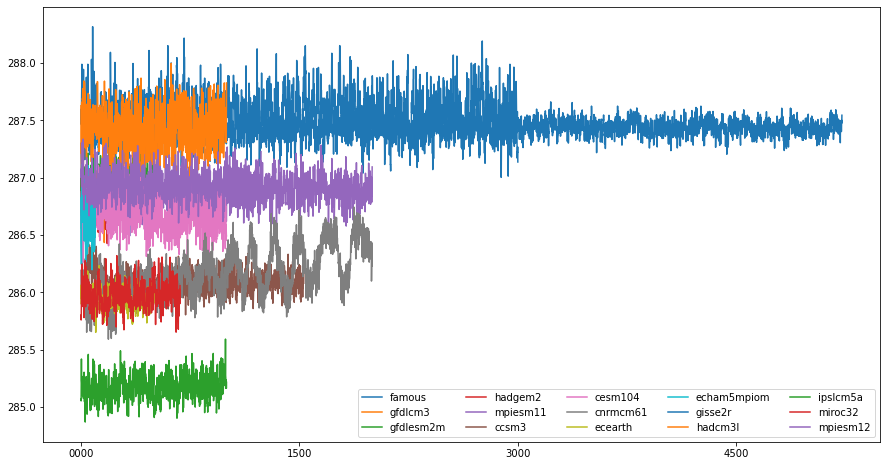

In [26]:
fig, ax = plt.subplots(figsize=(15,8))


time = control_ds_mean['time'].values
for var in list(control_ds_mean.data_vars):
    ax.plot(time, control_ds_mean[var].values, label=var)
    
ax.legend(ncol = 5)

In [27]:
control_ds

<xarray.Dataset>
Dimensions:      (time: 5225, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 1.5
Data variables: (12/15)
    famous       (time, lat, lon) float32 224.5 224.4 224.4 ... nan nan nan
    gfdlcm3      (time, lat, lon) float32 224.6 224.5 224.3 ... nan nan nan
    gfdlesm2m    (time, lat, lon) float32 229.8 229.8 229.6 ... nan nan nan
    hadgem2      (time, lat, lon) float32 226.3 226.3 226.3 ... nan nan nan
    mpiesm11     (time, lat, lon) float32 224.7 224.7 224.6 ... nan nan nan
    ccsm3        (time, lat, lon) float32 234.3 234.0 234.0 ... nan nan nan
    ...           ...
    echam5mpiom  (time, lat, lon) float32 228.7 228.4 228.4 ... nan nan nan
    gisse2r      (time, lat, lon) float32 225.4 225.3 225.2 ... 254.9 254.9
    hadcm3l      (time, lat, lon) float64 227.3 227.3 227.5 ... nan nan nan
    ipslcm5a     (time, lat, lon) float32 227.2 227.1 227.0 ... nan nan nan
    miroc32      (time, lat, lon) float32 227.2 227.0 226.9 ... nan nan nan
    mpiesm12     (time, lat, lon) float32 224.4 224.4 224.4 ... nan nan nan
Attributes:
    standard_name:  air_temperature
    units:          K
    cell_methods:   area: mean time: mean

In [31]:
abrupt4x_anom_array = []

for model in models:
    print(f'{model}, ', end='')

    abrupt4x_da = abrupt4x_ds[model]
    control_da = control_ds[model]

    abrupt_anom_da = abrupt4x_da.clima.anomalies(start = control_da.time.dt.year.values[0], 
                                  end = control_da.time.dt.year.values[-1],
                    historical = control_da)

    abrupt4x_anom_array.append(abrupt_anom_da)

famous, Using historical dataset
gfdlcm3, Using historical dataset
gfdlesm2m, Using historical dataset
hadgem2, Using historical dataset
mpiesm11, Using historical dataset
ccsm3, Using historical dataset
cesm104, Using historical dataset
cnrmcm61, Using historical dataset
ecearth, Using historical dataset
echam5mpiom, Using historical dataset
gisse2r, Using historical dataset
hadcm3l, Using historical dataset
ipslcm5a, Using historical dataset
miroc32, Using historical dataset
mpiesm12, Using historical dataset


In [40]:
abrupt4x_anom = xr.merge(abrupt4x_anom_array)

In [41]:
abrupt4x_anom

<xarray.Dataset>
Dimensions:      (time: 5900, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 1.5
Data variables: (12/15)
    famous       (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    gfdlcm3      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    gfdlesm2m    (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    hadgem2      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm11     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ccsm3        (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ...           ...
    echam5mpiom  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    gisse2r      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    hadcm3l      (time, lat, lon) float64 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ipslcm5a     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    miroc32      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm12     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>

In [42]:
abrupt4x_mean_array = []

for model in models:
    print(f'{model}, ', end='')

    abrupt4x_da = abrupt4x_anom[model]

    abrupt_mean_da = abrupt4x_da.clima.space_mean()

    abrupt4x_mean_array.append(abrupt_mean_da)
    
abrupt4x_mean = xr.merge(abrupt4x_mean_array)

famous, gfdlcm3, gfdlesm2m, hadgem2, mpiesm11, ccsm3, cesm104, cnrmcm61, ecearth, echam5mpiom, gisse2r, hadcm3l, ipslcm5a, miroc32, mpiesm12, 

In [44]:
abrupt4x_mean = abrupt4x_mean.compute()

In [46]:
abrupt4x_mean

<xarray.Dataset>
Dimensions:      (time: 5900)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
    height       float32 1.5
Data variables: (12/15)
    famous       (time) float64 1.508 2.445 3.113 3.674 ... nan nan nan nan
    gfdlcm3      (time) float64 0.6795 1.408 1.728 2.1 2.371 ... nan nan nan nan
    gfdlesm2m    (time) float64 0.7464 1.518 1.747 1.871 ... nan nan nan nan
    hadgem2      (time) float64 1.2 1.819 2.297 2.575 2.858 ... nan nan nan nan
    mpiesm11     (time) float64 0.984 1.628 2.228 2.489 ... nan nan nan nan
    ccsm3        (time) float64 2.277 2.562 2.729 2.639 ... nan nan nan nan
    ...           ...
    echam5mpiom  (time) float64 0.7807 1.878 2.421 2.497 ... nan nan nan nan
    gisse2r      (time) float64 1.2 1.86 2.06 2.172 2.414 ... nan nan nan nan
    hadcm3l      (time) float64 1.69 2.179 2.517 2.854 3.273 ... nan nan nan nan
    ipslcm5a     (time) float64 1.275 1.774 2.037 2.391 ... nan nan nan nan
    miroc32      (time) float64 0.899 1.735 2.173 2.556 ... nan nan nan nan
    mpiesm12     (time) float64 1.361 1.988 2.466 2.726 ... nan nan nan nan

In [ ]:
abrupt4x_mean['mean'] = 

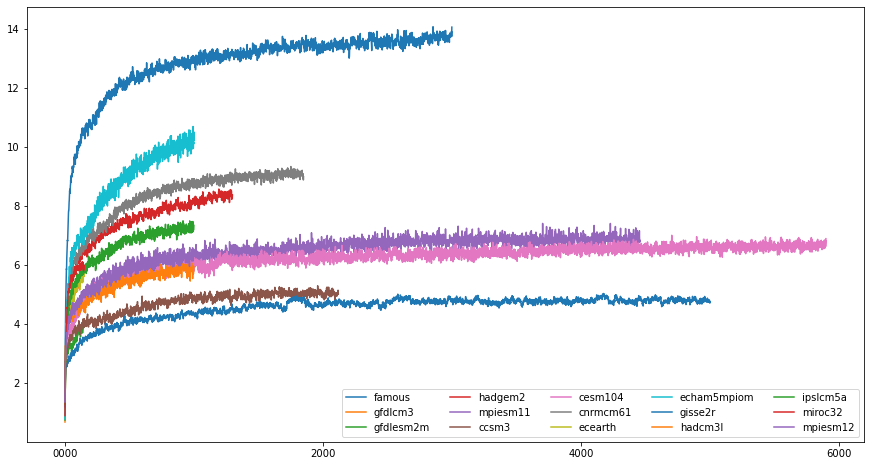

In [45]:
fig, ax = plt.subplots(figsize=(15,8))


time = abrupt4x_mean['time'].values
for var in list(abrupt4x_mean.data_vars):
    ax.plot(time, abrupt4x_mean[var].values, label=var)
    
ax.legend(ncol = 5)